In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\Data Science\projects\Heart-Disease-Prediction-master\heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [8]:
df.shape

(303, 14)

In [9]:
df.size

4242

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
#visualization

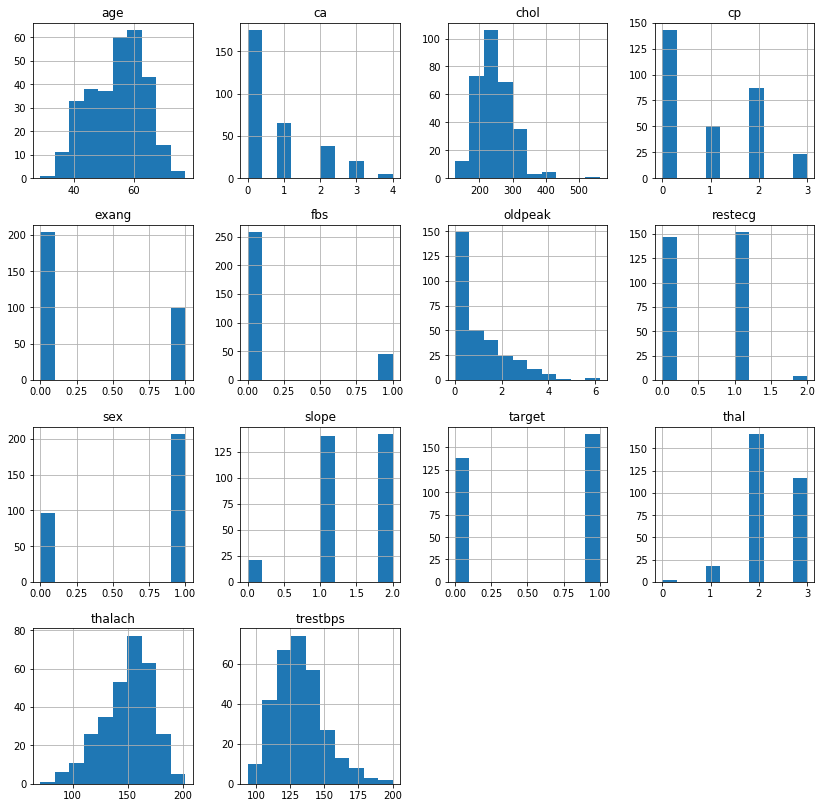

In [13]:
df.hist(figsize=(14,14))
plt.show()

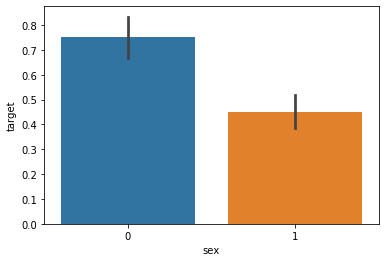

In [14]:
sns.barplot(df['sex'],df['target'])
plt.show()

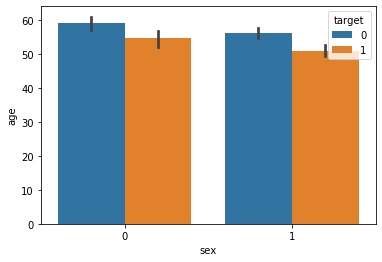

In [15]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

In [16]:
px.bar(df,df['sex'],df['target'])

In [17]:
numeric_columns=['trestbps','chol','age','oldpeak','thalach']

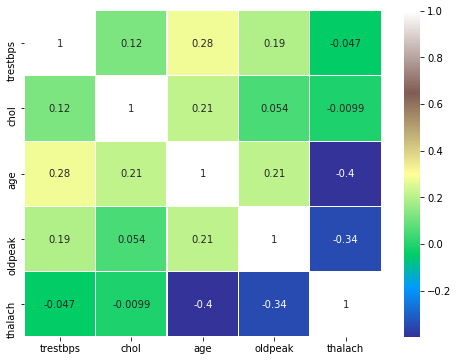

In [18]:
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

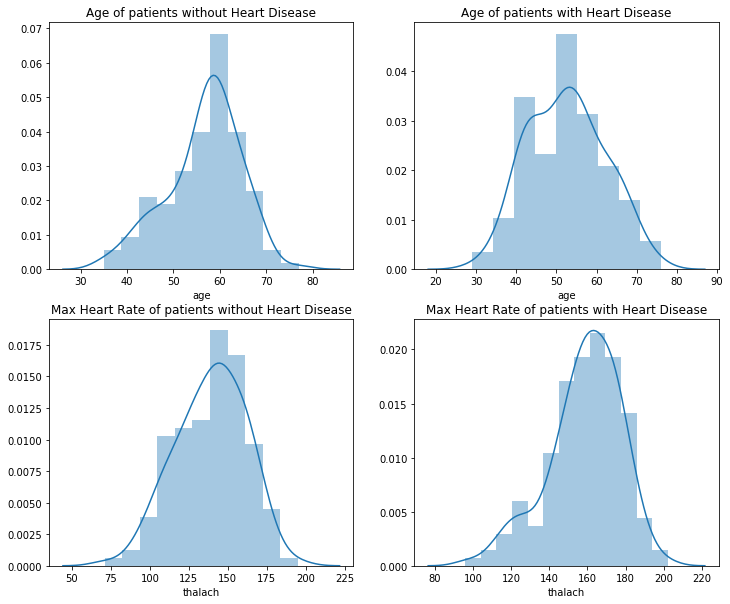

In [19]:
#create four displots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without Heart Disease')

plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with Heart Disease')

plt.subplot(223)
sns.distplot(df[df['target']==0].thalach)
plt.title('Max Heart Rate of patients without Heart Disease')

plt.subplot(224)
sns.distplot(df[df['target']==1].thalach)
plt.title('Max Heart Rate of patients with Heart Disease')
plt.show()


In [20]:
# Data preprocessing

In [21]:
X,y=df.loc[:,:'thal'],df['target']

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [27]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [28]:
# Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=9)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
prediction=dt.predict(X_test)

In [55]:
prediction

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [56]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [ ]:
# to find acurracy score we have to import it

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [59]:
accuracy_dt

74.72527472527473

In [60]:
dt.feature_importances_

array([0.03817042, 0.03461456, 0.33832546, 0.08491193, 0.10910213,
       0.        , 0.00971408, 0.08164087, 0.04724994, 0.06354625,
       0.06951942, 0.11770256, 0.00550238])

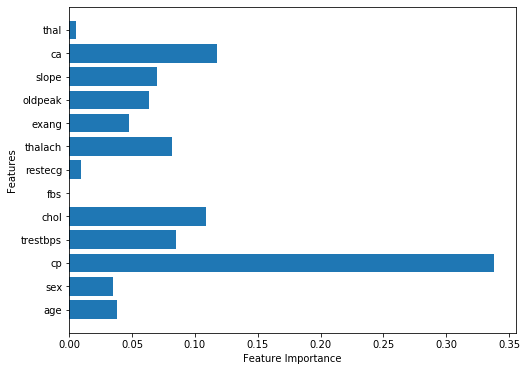

In [62]:
def plot_feature_importance(model):
    plt.figure(figsize=(8,6))
    n_fetures=13
    plt.barh(range(n_fetures),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_fetures),X)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1,n_fetures)
    
    
plot_feature_importance(dt)

In [63]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [64]:
custom_data=np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

In [65]:
custom_data_prediction_dt=dt.predict(custom_data)

In [66]:
custom_data_prediction_dt

array([1], dtype=int64)

In [67]:
Catagory=['No you dont have Heart Disease','Yes you have Heart Diesease']

In [68]:
print(Catagory[int(custom_data_prediction_dt)])

Yes you have Heart Diesease


In [ ]:
# KNN Algorithm

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [82]:
pridiction_knn=knn.predict(X_test)

In [83]:
accuracy_knn=accuracy_score(y_test,pridiction_knn)*100

In [84]:
accuracy_knn

64.83516483516483

In [85]:
custom_data_knn=np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

In [86]:
custom_data_prediction_knn=knn.predict(custom_data_knn)

In [87]:
custom_data_prediction_knn

array([1], dtype=int64)

In [88]:
print(Catagory[int(custom_data_prediction_knn)])

Yes you have Heart Diesease


In [89]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler().fit(X)
X_std=std.transform(X)

In [90]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [91]:
X_std

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [92]:
X_std.shape

(303, 13)

In [93]:
# for better accuracy we normalized the data and training another time

In [94]:
X_train_std,X_test_std,y_train_std,y_test_std=train_test_split(X_std,y,random_state=10,test_size=0.3,shuffle=True)

In [95]:
knn_std=KNeighborsClassifier()
knn_std.fit(X_train_std,y_train_std)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [97]:
X_test_std

array([[ 0.18017482, -1.46841752, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.40075247,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 1.06248543,  0.68100522,  1.00257707, ..., -0.64911323,
        -0.71442887,  1.12302895],
       ...,
       [ 0.29046364,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [-0.26098049,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.62133012,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895]])

In [98]:
pridiction_knn_std=knn_std.predict(X_test_std)

In [99]:
accuracy_knn_std=accuracy_score(y_test_std,pridiction_knn_std)*100

In [100]:
accuracy_knn_std

81.31868131868131

In [110]:
custom_data_knn_std=np.array([[37,1,2,130,250,0,1,187,0,3.5,0,0,2]])

In [111]:
custom_data_knn_std_tran=std.transform(custom_data_knn_std)

In [112]:
custom_data_knn_std_tran

array([[-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188]])

In [113]:
custom_data_prediction_knn_std=knn_std.predict(custom_data_knn_std_tran)

In [114]:
custom_data_prediction_knn_std

array([1], dtype=int64)

In [115]:
print(Catagory[int(custom_data_prediction_knn_std)])

Yes you have Heart Diesease


In [116]:
#predicting best accuracy score

In [119]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train_std)
    prediction_knn=knn.predict(X_test_std)
    scores[k]=accuracy_score(y_test_std,prediction_knn)
    scores_list.append(accuracy_score(y_test_std,prediction_knn))

In [120]:
scores

{1: 0.7582417582417582,
 2: 0.8131868131868132,
 3: 0.8241758241758241,
 4: 0.8571428571428571,
 5: 0.8131868131868132,
 6: 0.8021978021978022,
 7: 0.8021978021978022,
 8: 0.8241758241758241,
 9: 0.7802197802197802,
 10: 0.7802197802197802,
 11: 0.7802197802197802,
 12: 0.7912087912087912,
 13: 0.8021978021978022,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7802197802197802,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7802197802197802,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7912087912087912,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

In [121]:
scores_list

[0.7582417582417582,
 0.8131868131868132,
 0.8241758241758241,
 0.8571428571428571,
 0.8131868131868132,
 0.8021978021978022,
 0.8021978021978022,
 0.8241758241758241,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7912087912087912,
 0.8021978021978022,
 0.8021978021978022,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7912087912087912,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802]

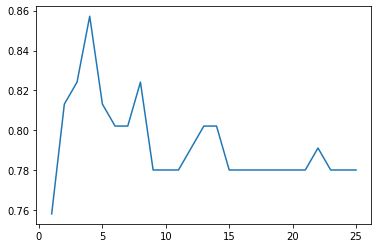

In [122]:
plt.plot(k_range,scores_list)

In [123]:
px.line(x=k_range,y=scores_list)

In [124]:
# doing with n=4

In [125]:
knn_std_s=KNeighborsClassifier(n_neighbors=4)
knn_std_s.fit(X_train_std,y_train_std)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [131]:
pridiction_knn_std_s=knn_std_s.predict(X_test_std)

In [132]:
accuracy_knn_std_s=accuracy_score(y_test_std,pridiction_knn_std_s)*100

In [133]:
accuracy_knn_std_s

85.71428571428571

In [134]:
# so with this we increase accuracy

In [135]:
# ploting which algoritm did best

In [136]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn_std_s]

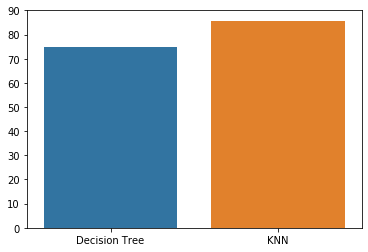

In [137]:
sns.barplot(algorithms,scores)

In [ ]:
knn_std=KNeighborsClassifier()
knn_std.fit(X_train,y_train)